In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('C:\\Users\\maraw\\OneDrive\\Desktop\\Things\\Employee-salary-prediction.csv')

In [3]:
data

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,Male,Bachelor's,Software Engineer,5.0,90000
1,28,Female,Master's,Data Analyst,3.0,65000
2,45,Male,PhD,Senior Manager,15.0,150000
3,36,Female,Bachelor's,Sales Associate,7.0,60000
4,52,Male,Master's,Director,20.0,200000
...,...,...,...,...,...,...
368,35,Female,Bachelor's,Senior Marketing Analyst,8.0,85000
369,43,Male,Master's,Director of Operations,19.0,170000
370,29,Female,Bachelor's,Junior Project Manager,2.0,40000
371,34,Male,Bachelor's,Senior Operations Coordinator,7.0,90000


In [4]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,Male,Bachelor's,Software Engineer,5.0,90000
1,28,Female,Master's,Data Analyst,3.0,65000
2,45,Male,PhD,Senior Manager,15.0,150000
3,36,Female,Bachelor's,Sales Associate,7.0,60000
4,52,Male,Master's,Director,20.0,200000


In [5]:
data.tail()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
368,35,Female,Bachelor's,Senior Marketing Analyst,8.0,85000
369,43,Male,Master's,Director of Operations,19.0,170000
370,29,Female,Bachelor's,Junior Project Manager,2.0,40000
371,34,Male,Bachelor's,Senior Operations Coordinator,7.0,90000
372,44,Female,PhD,Senior Business Analyst,15.0,150000


In [6]:
data.shape

(373, 6)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    int64  
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 17.6+ KB


In [8]:
data.dtypes

Age                      int64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                   int64
dtype: object

In [9]:
data['Gender'] = data['Gender'].astype('category')
data['Education Level'] = data['Education Level'].astype('category')
data['Job Title'] = data['Job Title'].astype('category')

In [10]:
data.dtypes

Age                       int64
Gender                 category
Education Level        category
Job Title              category
Years of Experience     float64
Salary                    int64
dtype: object

In [11]:
data.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [12]:
data_encoded = data.copy()

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
LE = LabelEncoder()
data_encoded['Gender'] = LE.fit_transform(data_encoded[['Gender']])

In [15]:
data_encoded['Gender'].unique()

array([1, 0])

In [16]:
print('Category Mapping:', dict(zip(data['Gender'], data_encoded['Gender'])))

Category Mapping: {'Male': 1, 'Female': 0}


In [17]:
data_encoded['Education Level'] = LE.fit_transform(data_encoded[['Education Level']])

In [18]:
data_encoded['Education Level'].unique()

array([0, 1, 2])

In [19]:
print('Category Mapping:', dict(zip(data['Education Level'], data_encoded['Education Level'])))

Category Mapping: {"Bachelor's": 0, "Master's": 1, 'PhD': 2}


In [20]:
data_encoded['Job Title'] = LE.fit_transform(data_encoded[['Job Title']])

In [21]:
data_encoded['Job Title'].unique()

array([159,  17, 130, 101,  22,  81,  93, 104,  82, 150, 158,  40,  36,
        96,  13,  89,  83, 116,  18, 102,   3, 172,  44,  98,  37, 157,
       160,  57, 112,  92,   6,   1,  19,  84, 167,  39,  95,  16, 103,
       169,  88,  85,   2, 162,  10,   0,  29,  41,  12,   5,  34, 171,
        38, 170, 156,  30, 115,  47,  21,  43,  14,   4, 118, 173,  99,
       166,  11, 153,  42,   9, 165, 106,   8,  56,  35,  46, 144,  91,
       164, 134, 168, 100,  76,  97,  87,  94, 122,  80, 143,   7,  20,
        45, 131,  15, 120, 161, 163, 110,  62,  86,  90,  61, 141,  66,
       121, 105, 152,  79, 154, 146,  73,  64,  54, 142,  49, 148,  65,
        70, 109,  32,  71, 111, 139,  53, 129,  59, 138,  28,  77, 149,
        31,  52, 132, 125,  50, 108, 147,  60,  25,  63,  55, 136, 124,
       155,  69, 135, 128, 145,  33, 107,  23,  74, 126, 113,  27,  48,
        78, 133, 127, 117,  51,  75, 140,  68, 151,  72, 119, 123, 114,
        67,  26, 137,  58,  24])

In [22]:
print('Category Mapping:', dict(zip(data['Job Title'], data_encoded['Job Title'])))

Category Mapping: {'Software Engineer': 159, 'Data Analyst': 17, 'Senior Manager': 130, 'Sales Associate': 101, 'Director': 22, 'Marketing Analyst': 81, 'Product Manager': 93, 'Sales Manager': 104, 'Marketing Coordinator': 82, 'Senior Scientist': 150, 'Software Developer': 158, 'HR Manager': 40, 'Financial Analyst': 36, 'Project Manager': 96, 'Customer Service Rep': 13, 'Operations Manager': 89, 'Marketing Manager': 83, 'Senior Engineer': 116, 'Data Entry Clerk': 18, 'Sales Director': 102, 'Business Analyst': 3, 'VP of Operations': 172, 'IT Support': 44, 'Recruiter': 98, 'Financial Manager': 37, 'Social Media Specialist': 157, 'Software Manager': 160, 'Junior Developer': 57, 'Senior Consultant': 112, 'Product Designer': 92, 'CEO': 6, 'Accountant': 1, 'Data Scientist': 19, 'Marketing Specialist': 84, 'Technical Writer': 167, 'HR Generalist': 39, 'Project Engineer': 95, 'Customer Success Rep': 16, 'Sales Executive': 103, 'UX Designer': 169, 'Operations Director': 88, 'Network Engineer': 

In [23]:
data_encoded

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32,1,0,159,5.0,90000
1,28,0,1,17,3.0,65000
2,45,1,2,130,15.0,150000
3,36,0,0,101,7.0,60000
4,52,1,1,22,20.0,200000
...,...,...,...,...,...,...
368,35,0,0,131,8.0,85000
369,43,1,1,30,19.0,170000
370,29,0,0,70,2.0,40000
371,34,1,0,137,7.0,90000


In [24]:
data_encoded.describe()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,37.431635,0.520107,0.536193,89.954424,10.030831,100577.345845
std,7.069073,0.500267,0.723569,46.511423,6.557007,48240.013482
min,23.000000,0.000000,0.000000,0.000000,0.000000,350.000000
25%,31.000000,0.000000,0.000000,50.000000,4.000000,55000.000000
50%,36.000000,1.000000,0.000000,95.000000,9.000000,95000.000000
75%,44.000000,1.000000,1.000000,132.000000,15.000000,140000.000000
max,53.000000,1.000000,2.000000,173.000000,25.000000,250000.000000


In [25]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    int64  
 1   Gender               373 non-null    int32  
 2   Education Level      373 non-null    int32  
 3   Job Title            373 non-null    int32  
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    int64  
dtypes: float64(1), int32(3), int64(2)
memory usage: 13.2 KB


In [26]:
data_encoded.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

<Axes: >

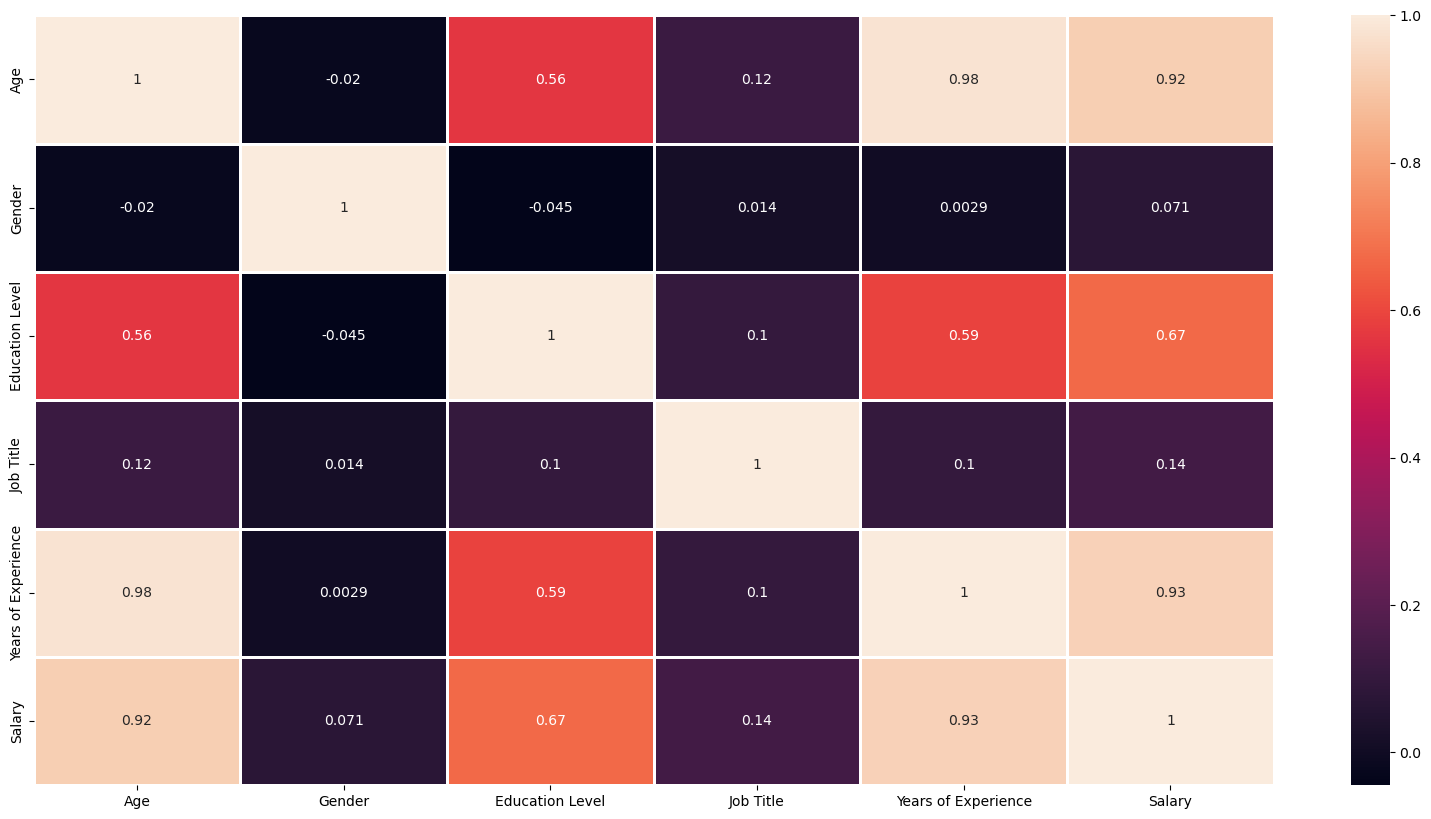

In [27]:
plt.figure(figsize=(20,10))
sns.heatmap(data_encoded.corr(),annot=True,linewidths=2)

In [28]:
new_data = data_encoded.drop(columns=['Age'])

<Axes: >

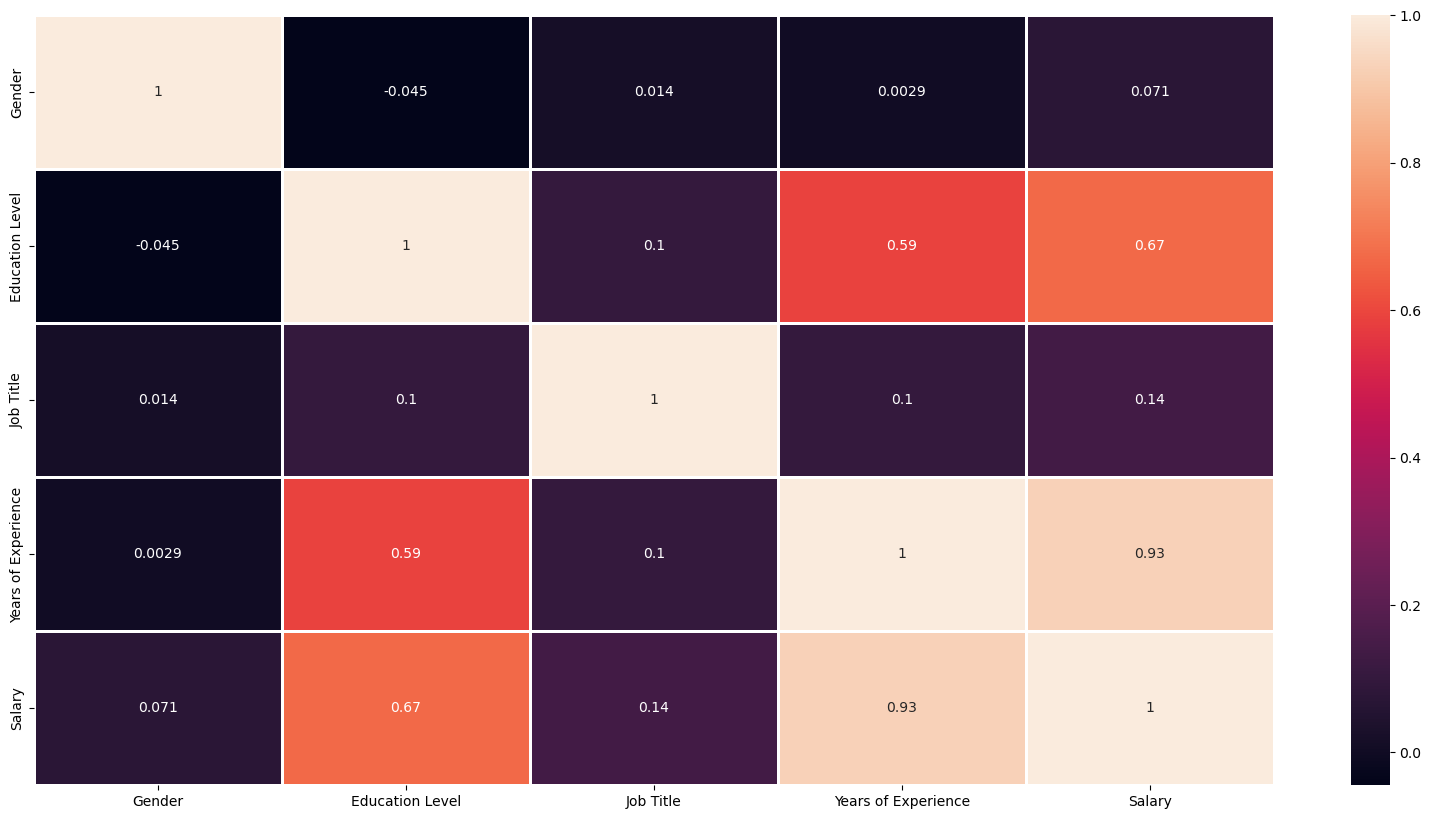

In [29]:
plt.figure(figsize=(20,10))
sns.heatmap(new_data.corr(),annot=True,linewidths=2)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
Y = data_encoded['Salary']
X = data_encoded.drop(['Salary'], axis=1)

In [32]:
X.head()

,Age,Gender,Education Level,Job Title,Years of Experience
0,32,1,0,159,5.0
1,28,0,1,17,3.0
2,45,1,2,130,15.0
3,36,0,0,101,7.0
4,52,1,1,22,20.0


In [33]:
Y.head()

0     90000
1     65000
2    150000
3     60000
4    200000
Name: Salary, dtype: int64

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8, random_state =0)

print("The shape of X_train is:", X_train.shape)
print("The shape of X_test is:", X_test.shape)
print('')
print("The shape of Y_train is:", Y_train.shape)
print("The shape of Y_test is:", Y_test.shape)

The shape of X_train is: (298, 5)
The shape of X_test is: (75, 5)

The shape of Y_train is: (298,)
The shape of Y_test is: (75,)


In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
SS = StandardScaler()

In [37]:
X_train_scaled = SS.fit_transform(X_train)
X_test_scaled = SS.transform(X_test)

In [38]:
X_train_scaled

array([[-0.9476711 , -1.0767638 , -0.74242355, -0.70547169, -1.10430891],
       [-0.66313106, -1.0767638 , -0.74242355, -0.55361802, -0.79995371],
       [-0.37859103, -1.0767638 , -0.74242355,  0.8564518 , -0.34342092],
       ...,
       [ 1.47091923,  0.92870878,  1.95565227, -0.03297685,  1.48271025],
       [ 1.04410917, -1.0767638 ,  0.60661436, -1.35627315,  0.87399986],
       [ 0.75956913,  0.92870878, -0.74242355,  1.13846577,  0.87399986]])

In [39]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [40]:
X_train_scaled

,Age,Gender,Education Level,Job Title,Years of Experience
0,-0.947671,-1.076764,-0.742424,-0.705472,-1.104309
1,-0.663131,-1.076764,-0.742424,-0.553618,-0.799954
2,-0.378591,-1.076764,-0.742424,0.856452,-0.343421
3,1.328649,0.928709,1.955652,0.509358,1.634888
4,0.190489,-1.076764,-0.742424,-1.941994,-0.039066
...,...,...,...,...,...
293,-0.236321,0.928709,-0.742424,1.008305,-0.191243
294,-0.520861,0.928709,-0.742424,1.073386,-0.495599
295,1.470919,0.928709,1.955652,-0.032977,1.482710
296,1.044109,-1.076764,0.606614,-1.356273,0.874000


In [41]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [42]:
X_test_scaled

,Age,Gender,Education Level,Job Title,Years of Experience
0,-1.374481,-1.076764,-0.742424,-1.768447,-1.256487
1,-1.089941,0.928709,-0.742424,-0.922406,-1.256487
2,-1.232211,-1.076764,-0.742424,-1.161033,-1.104309
3,1.044109,0.928709,0.606614,1.312013,0.874000
4,-0.378591,-1.076764,-0.742424,0.856452,-0.343421
...,...,...,...,...,...
70,-1.516751,-1.076764,0.606614,1.702494,-1.256487
71,-1.659021,-1.076764,-0.742424,-0.206524,-1.408664
72,-0.378591,0.928709,0.606614,1.312013,-0.191243
73,-1.232211,-1.076764,-0.742424,-0.900712,-1.332575


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [44]:
linear_model = LinearRegression()

In [45]:
linear_model.fit(X_train_scaled,Y_train)

LinearRegression()

In [46]:
print("The intercept term of the linear model:", linear_model.intercept_)

The intercept term of the linear model: 101964.26174496644


In [47]:
print("The coefficients of the linear model:", linear_model.coef_)

The coefficients of the linear model: [18717.40782603  4736.03042794  9997.21217986  1194.64538122
 20642.82466283]


In [48]:
print("The Score of the Training:", linear_model.score(X_train_scaled,Y_train))

The Score of the Training: 0.8970064362242435


In [49]:
cdf = pd.DataFrame(data=linear_model.coef_, index=X_train_scaled.columns, columns=["Coefficients"])

In [50]:
cdf

,Coefficients
Age,18717.407826
Gender,4736.030428
Education Level,9997.212180
Job Title,1194.645381
Years of Experience,20642.824663


In [51]:
predictions = linear_model.predict(X_test_scaled)
print ("Type of the predicted object:", type(predictions))
print ("Size of the predicted object:", predictions.shape)

Type of the predicted object: <class 'numpy.ndarray'>
Size of the predicted object: (75,)


In [52]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(Y_test,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(Y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(Y_test,predictions)))

Mean absolute error (MAE): 10106.183119851234
Mean square error (MSE): 168722838.0160792
Root mean square error (RMSE): 12989.335549445137


In [53]:
print("R-squared value of predictions:",round(metrics.r2_score(Y_test,predictions),3))

R-squared value of predictions: 0.917


In [54]:
print("The Score of the Testing:", linear_model.score(X_test_scaled,Y_test))

The Score of the Testing: 0.9169805443702949


In [55]:
print(linear_model.predict([[52,1,1,22,20.0]]))

[1529141.40294948]


In [56]:
import pickle

In [57]:
with open('Final_Project','wb') as f:
    pickle.dump(linear_model,f)